# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [1]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [3]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845830152


### Graph t vs $\epsilon$

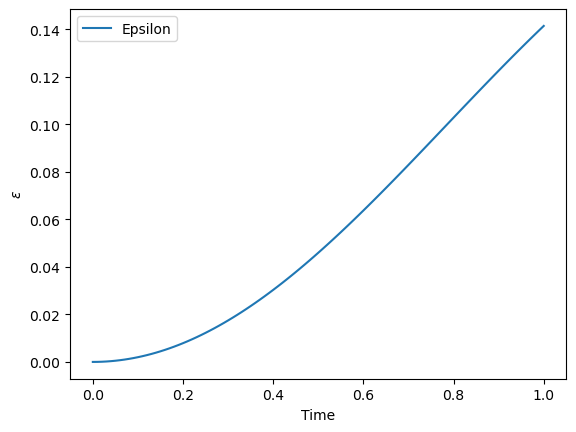

In [4]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [5]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [6]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(10))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845830152
For m = 4 the error is 0.000249635378216025
For m = 6 the error is 0.00016640438462290198
For m = 8 the error is 0.00012479824917967564
For m = 10 the error is 9.983673349921259e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845830152
For m = 3 the error is 1.2499098133246424e-05
For m = 6 the error is 1.8775597711948834e-07
For m = 11 the error is 2.6064627389811953e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845830133
For m = 3 the error is 1.249909813324385e-05
For m = 4 the error is 2.903186326102563e-07
For m = 6 the error is 8.175186759985752e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 10 the error is 2.8110323699019795e-08
[0.024471741852423214, 0.07101976096010307, 0.11061587104123713, 0.13938412895876287, 0.15450849718747361, 0.154508497187473

In [7]:
# values found below

m_values_optimized = [2,3,4]
error_optimized = [0.0004995820845829024, 4.16299704372454e-07, 2.022947457958505e-07]

### Graph t vs $\epsilon$

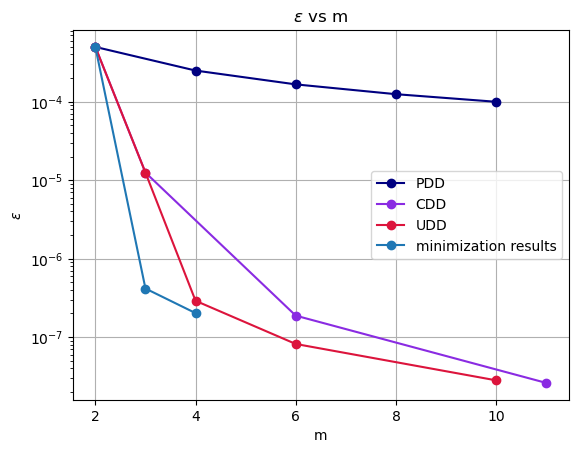

In [8]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized, marker='o', label = "minimization results")


plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T and m

### When m = 2

Fix T, $\lambda\$ and m = 2

In [9]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon    

In [10]:
# Starting guess
s_values_start = [0.5,0.5]

# Constraints -> s1 + s2 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='trust-constr', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
print("s1 = " + str(s1) + " s2 = " + str(s2))

`gtol` termination condition is satisfied.
Number of iterations: 1, function evaluations: 3, CG iterations: 0, optimality: 1.98e-17, constraint violation: 0.00e+00, execution time: 0.0011 s.
s1 = 0.5 s2 = 0.5


In [11]:
# lowest value found above - lowest so Far
epsilon_func([0.5, 0.5])

0.0004995820845830152

In [12]:
# minimized value
epsilon_func([s1,s2])

0.0004995820845830152

### When m = 3
Fix T, $\lambda\$ and m = 3

In [13]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(A, expm(-1j*(Z+lambda_value*X)*s3*T))
    difference = B - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [14]:
# Starting guess
s_values_start = [np.random.random(),np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='trust-constr', options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3)

/usr/lib/python3/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


The maximum number of function evaluations is exceeded.
Number of iterations: 1000, function evaluations: 3988, CG iterations: 998, optimality: 1.09e-03, constraint violation: 2.22e-16, execution time:  3.5 s.
s1 =  0.3339069391822773  s2 =  0.4334402514673183  s3 =  0.23265280935040447


In [15]:
# lowest value found above
epsilon_func([1/4,1/2,1/4])

1.2499098133246424e-05

In [16]:
# minimized value
print(s1+s2+s3)
epsilon_func([s1,s2,s3])


1.0000000000000002


0.0013206132587571227

In [17]:
# lowest found

#s1 =  0.25031269456576893  s2 =  0.49937461113734705  s3 =  0.2503126942968841
#4.16299704372454e-07
print(epsilon_func([0.25031269456576893,0.49937461113734705,0.2503126942968841]))

s1 =  0.2503130334449466  
s2 =  0.49937393184986445  
s3 =  0.250313034705189
print(s1+s2+s3)
epsilon_func([s1,s2,s3])

4.162997043890197e-07
1.0


4.165208333667796e-07

### When m = 4
Fix T, $\lambda\$ and m = 4

In [18]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(expm(-1j*(Z+lambda_value*X)*s3*T), expm(-1j*(Z-lambda_value*X)*s4*T))
    C = np.dot(A,B)
    difference = C - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [19]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start, method='trust-constr',options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4)

The maximum number of function evaluations is exceeded.
Number of iterations: 1000, function evaluations: 4975, CG iterations: 1001, optimality: 2.71e-05, constraint violation: 0.00e+00, execution time:  4.5 s.
s1 =  0.2584558683258168  s2 =  0.17807258131937487  s3 =  0.24145829290659862  s4 =  0.32201325744820986


In [20]:
# lowest s in prev part
epsilon_func([0.14644660940672624, 0.3535533905932736, 0.35355339059327384, 0.14644660940672627])

2.9031863262767787e-07

In [21]:
# minimized values
print(s1+s2+s3+s4)
epsilon_func([s1,s2,s3,s4])


1.0


0.00032762458915125154

In [22]:
print(epsilon_func([0.14002269377036433,0.3471307048304575,0.35994513617231017,0.1529014652268681] ))
print(epsilon_func([0.14852368879439615,0.35548431730913477,0.3514863478995621,0.144505645996907]))
#lowest found

#s1 =  0.14002269377036433
#s2 =  0.3471307048304575  
#s3 =  0.35994513617231017  
#s4 =  0.1529014652268681
# 2.0282149550342433e-07

#s1 =  0.14852368879439615  
#s2 =  0.35548431730913477  
#s3 =  0.3514863478995621  
#s4 =  0.144505645996907
# 2.022947457958505e-07



s1 =  0.03765566095204766  
s2 =  0.27063906421385175  
s3 =  0.4618681202205331  
s4 =  0.22984044745027865
print(s1+s2+s3+s4)
epsilon_func([s1,s2,s3,s4])

2.028214954896133e-07
2.0229474581783525e-07
1.000003292836711


9.336118121897684e-08

### When m = 6
Fix T, $\lambda\$ and m = 6

In [23]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(expm(-1j*(Z+lambda_value*X)*s3*T), expm(-1j*(Z-lambda_value*X)*s4*T))
    C = np.dot(expm(-1j*(Z+lambda_value*X)*s5*T), expm(-1j*(Z-lambda_value*X)*s6*T))
    D = np.dot(np.dot(A,B),C)
    
    difference = D - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [24]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random() ]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] - 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0, 1.0),(0.0,1.0),(0.0, 1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start,options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.495974204043192e-07
            Iterations: 11
            Function evaluations: 86
            Gradient evaluations: 11
s1 =  0.04386697579268919  s2 =  0.2583678622480234  s3 =  0.08461020293905265  s4 =  0.02004688268643499  s5 =  0.37108020359374977  s6 =  0.22202787274005004


In [25]:
# lowest s in prev part
epsilon_func([0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059])

8.175186759985748e-08

In [26]:
# minimized values
print(s1+s2+s3+s4+s5+s6)
epsilon_func([s1,s2,s3,s4,s5,s6])


1.0


8.495974204043192e-07

In [27]:
#lowest found

print(s1+s2+s3+s4+s5+s6)
epsilon_func([s1,s2,s3,s4,s5,s6])

1.0


8.495974204043192e-07

### When m = 10
Fix T, $\lambda\$ and m = 10

In [28]:
# Defining the funtion epsilon
def epsilon_func(s_values):
    s1 = s_values[0]
    s2 = s_values[1]
    s3 = s_values[2]
    s4 = s_values[3]
    s5 = s_values[4]
    s6 = s_values[5]
    s7 = s_values[6]
    s8 = s_values[7]
    s9 = s_values[8]
    s10 = s_values[9]
    lambda_value = 0.1
    T = 0.1
    A = np.dot(expm(-1j*(Z+lambda_value*X)*s1*T), expm(-1j*(Z-lambda_value*X)*s2*T))
    B = np.dot(expm(-1j*(Z+lambda_value*X)*s3*T), expm(-1j*(Z-lambda_value*X)*s4*T))
    C = np.dot(expm(-1j*(Z+lambda_value*X)*s5*T), expm(-1j*(Z-lambda_value*X)*s6*T))
    D = np.dot(expm(-1j*(Z+lambda_value*X)*s7*T), expm(-1j*(Z-lambda_value*X)*s8*T))
    E = np.dot(expm(-1j*(Z+lambda_value*X)*s9*T), expm(-1j*(Z-lambda_value*X)*s10*T))
    
    F = np.dot(np.dot(A,B),C)
    G = np.dot(np.dot(F,D),E)
    
    difference = G - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

In [29]:
# Starting guess
s_values_start = [np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()]

# Constraints -> s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9 + s10 = 1 
const = ({'type':'eq',
          'fun' : lambda s_values : (s_values[0] + s_values[1] + s_values[2] + s_values[3] + s_values[4] + s_values[5] + 
                                     s_values[6] + s_values[7] + s_values[9] + s_values[9]- 1)})
# Bounds
bounds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# optimizing
result =  spo.minimize(epsilon_func, s_values_start,options={"disp":True}, constraints = const, bounds = bounds)

# print result
s_values = result.x
s1 = s_values[0]
s2 = s_values[1]
s3 = s_values[2]
s4 = s_values[3]
s5 = s_values[4]
s6 = s_values[5]
s7 = s_values[6]
s8 = s_values[7]
s9 = s_values[8]
s10 = s_values[9]
print("s1 = ", s1, " s2 = ", s2, " s3 = ", s3, " s4 = ", s4," s5 = ", s5, " s6 = ", s6, " s7 = ", s7, " s8 = ", s8," s9 = ", s9, " s10 = ", s10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.702145372695376e-07
            Iterations: 22
            Function evaluations: 256
            Gradient evaluations: 22
s1 =  1.0893373603979561e-05  s2 =  0.0630205785740419  s3 =  0.0009652327607933854  s4 =  0.13013494788189153  s5 =  0.004925456308775413  s6 =  0.042941207495007724  s7 =  0.26073869414844963  s8 =  0.03174735541512714  s9 =  0.23275621410968478  s10 =  0.23275781702115464


In [30]:
# lowest s in prev part
epsilon_func([0.024471741852423214, 0.07101976096010307, 0.11061587104123718, 0.13938412895876282, 0.15450849718747361, 0.15450849718747384, 0.13938412895876295, 0.11061587104123694, 0.0710197609601032, 0.02447174185242318])

2.8110323751715706e-08

In [31]:
# minimized values
print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10])


0.9999983970885302


7.702145372695376e-07

In [32]:
#lowest found



print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10])

0.9999983970885302


7.702145372695376e-07